## <center> The Sparks Foundation - Internship </center>
### DOMAIN - Data Science and Bussines Analytics
<hr></hr>

**TASK**
+ Exploratory Data Analysis - Retail Business
+ Performing "Exploratory Data Analysis" on dataset 'SampleSuperstore'

**DATASET**
+ The data which I have used in here for my EDA can be found <a href="https://bit.ly/3i4rbWl">here</a> 

**GOAL**
+ Will try to find out the weak areas where one can work to make more profit. 
+ To derieve all the business problems one can derive from exploring the data.
<hr></hr>

### <code>ANALYST - GAURAV SINGH</code>

### <center> Exploratory Data Analysis - Retail Business </center>

In [324]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [325]:
# to ignore the depreciation warning if any, we import warnings package

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [326]:
# importing dataset from the local file

retail_b = pd.read_csv('SampleSuperstore.csv')

In [327]:
# exploring the top 5 rows of data

retail_b.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [328]:
# checking the dimensions of the dataframe

retail_b.shape

(9994, 13)

In [329]:
# checking the names of the columns in the retail_b dataframe

retail_b.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [330]:
# extracting the info of each column (checking for the data_type and null values if any)

retail_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [331]:
# to see the basic stats data of our imported dataframe

retail_b.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [332]:
# seeing if there is any null data or not

print(retail_b.count())

print('-----------------OR-----------------')

print(retail_b.isnull().sum())

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64
-----------------OR-----------------
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


**So we dont have any null values and all the data is properly arranged in the dataset and nothing is missing as we have full 9994 entries in each of the column.**

In [333]:
# now checking for any unique values present in the dataset

retail_b.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**After checking for the unique values which might be present in the dataframe, we found out that:**
+ In this dataset we are only dealoing with the country USA
+ Postal Code will carry no meaning during our data analysis as we already have state and city mentioned.
+ So we will be dropping those columns as it wont be needed during our data analysis

In [334]:
# dropping the columns "Country" and "Postal Code"

retail_b.drop(columns=['Country', 'Postal Code'], inplace=True)
retail_b.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [335]:
# checking for any duplicity in the dataset

retail_dupli = retail_b.duplicated()
retail_dupli.sum()

50

In [336]:
retail_b.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Here when checking for duplicity, if there are any duplicate values it will return <code>"True"</code> or <code>1</code> in in the integer format, so therefore when we apply the sum method on the <code>retail_dupli</code> we get 50 means there are a total of 50 duplicate values. But after carefully seeing these are not exactly the kind of duplicate values which need to be removed. As its just that in some columns are having same values but not all.**

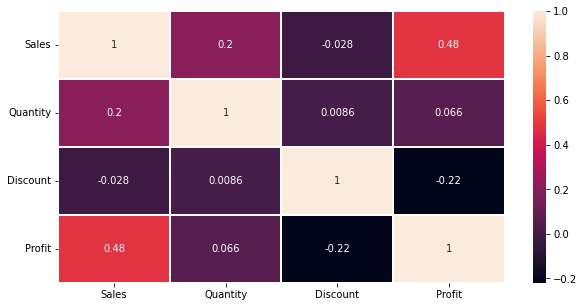

In [337]:
#create the correlation matrix heat map

retail_corr = retail_b.corr()
plt.figure(figsize=(10,5))
sns.heatmap(retail_corr, xticklabels = retail_corr.columns, yticklabels = retail_corr.columns, linewidths=.1, \
            cmap="rocket", annot=True)
plt.yticks(rotation=0);

In [338]:
retail_by_ship_mode = retail_b.groupby('Ship Mode').agg('sum')
retail_by_ship_mode

,Sales,Quantity,Discount,Profit
Ship Mode,,,,
First Class,3.514284e+05,5693,253.17,48969.8399
Same Day,1.283631e+05,1960,82.75,15891.7589
Second Class,4.591936e+05,7423,270.15,57446.6354
Standard Class,1.358216e+06,22797,955.02,164088.7875


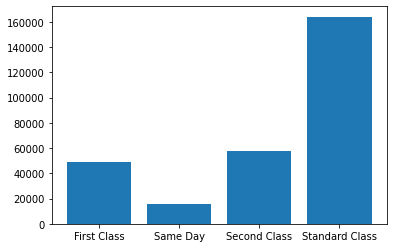

In [339]:
plt.bar(retail_by_ship_mode.index,retail_by_ship_mode['Profit'])
plt.show()

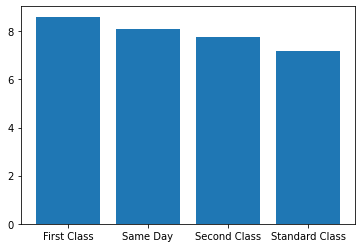

In [340]:
profit_per_quantity_bought = retail_by_ship_mode['Profit'] / retail_by_ship_mode['Quantity']
plt.bar(retail_by_ship_mode.index,profit_per_quantity_bought )
plt.show()

**So what we see is that the <code>maximum profit</code> is generated in the <code>Standard Class Delievery Mode</code>, but the <code>maximum profit per quantity</code> bought by customers is from <code>First Class</code>. So we should be paying <code>more attention</code> to the <code>Standard Delievery Class</code> along with First Class because if the customers are happy with the <code>Standard Deleivery</code>, it will <code>automatically increase our sales and profit</code> while also help beating other competitors in the market.**

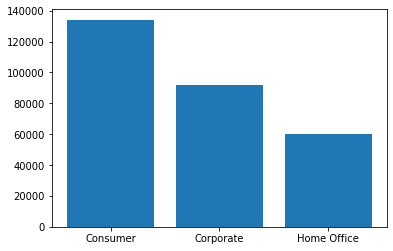

In [341]:
# plotting the graph by "Segment" column to know the max profit

retail_by_segment = retail_b.groupby('Segment').agg('sum')
plt.bar(retail_by_segment.index, retail_by_segment['Profit'])
plt.show()

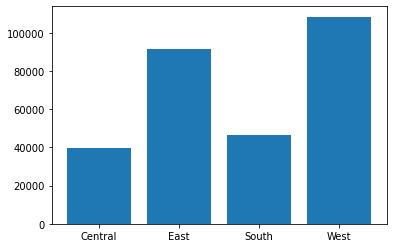

In [342]:
# plotting the graph by "Region" column to know the max profit

retail_by_region = retail_b.groupby('Region').agg('sum')
plt.bar(retail_by_region.index, retail_by_region['Profit'])
plt.show()

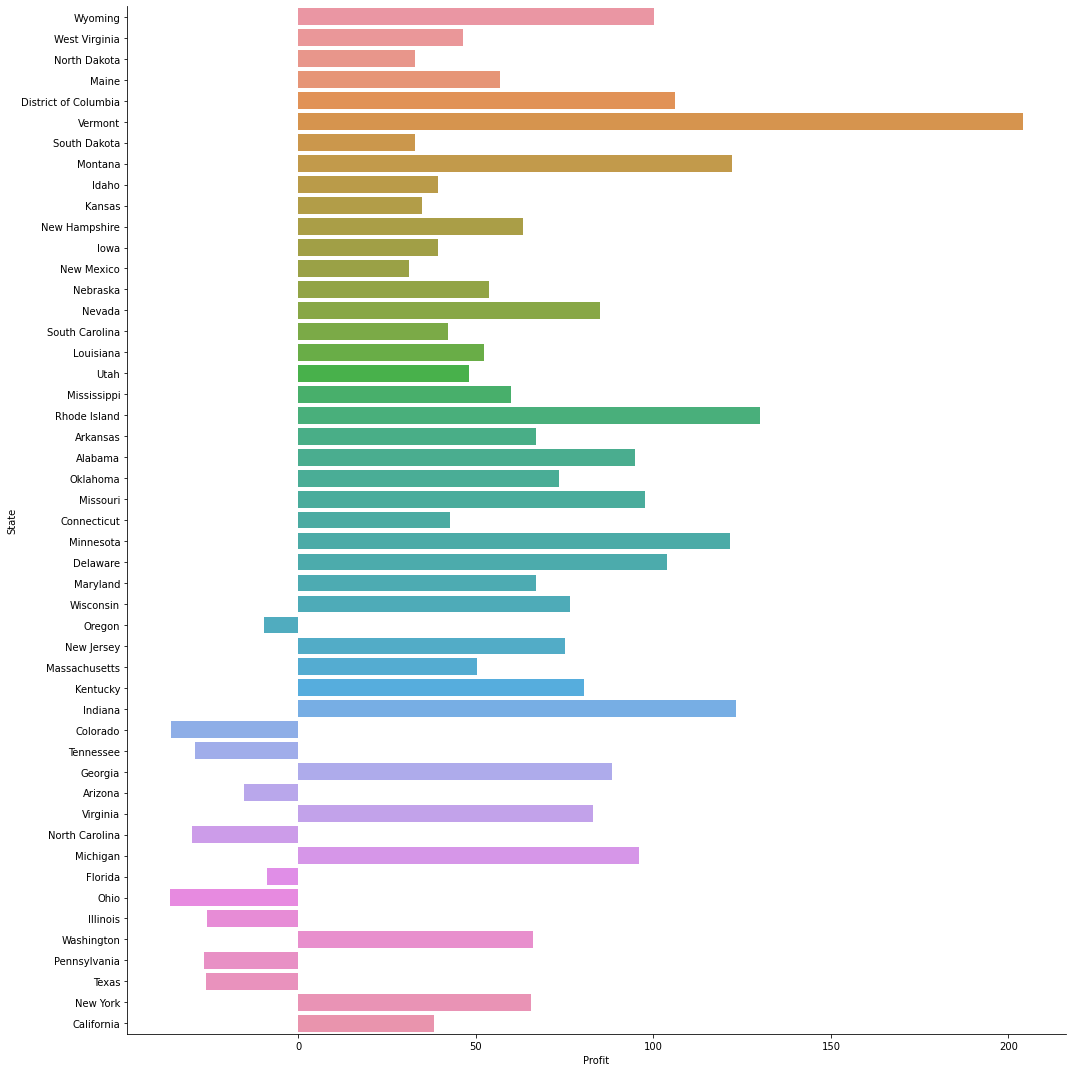

In [343]:
# plotting the graph by "Segment" column to know the average profit

retail_by_state = retail_b.groupby(["State"])["Profit"].mean().sort_values().index
sns.catplot(y="State",x="Profit",data=retail_b,kind='bar',ci=None,height=15,order=order)
plt.show()

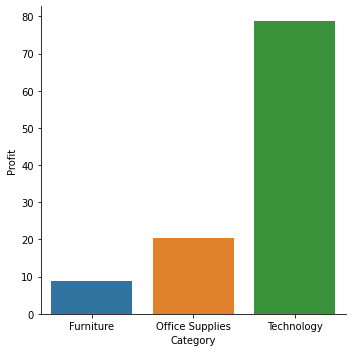

In [344]:
# plotting the graph by "Category" column to know the max profit
sns.catplot(x="Category",y="Profit",data=retail_b,kind="bar",ci=None)
plt.show()

In [345]:
retail_by_sub_cat = retail_b.groupby('Sub-Category').agg(sum)
retail_by_sub_cat

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27118.7920,3000,59.60,6527.7870
Binders,203412.7330,5974,567.00,30221.7633
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,328449.1030,2356,105.00,26590.1663
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


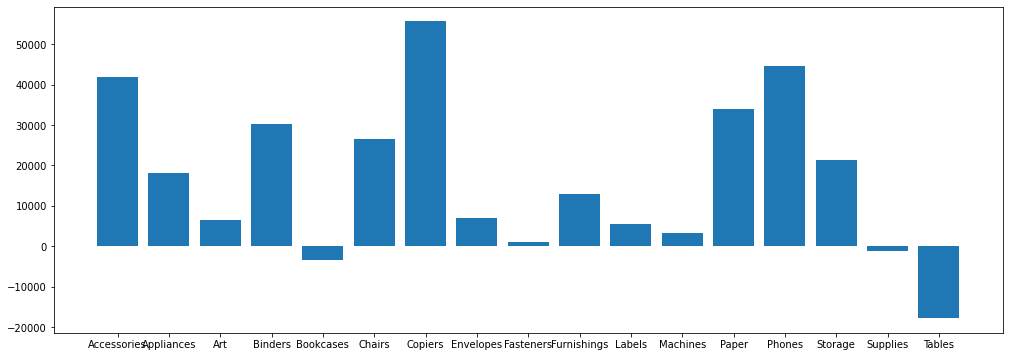

In [346]:
plt.figure(figsize=(17,6))
plt.bar(retail_by_sub_cat.index,retail_by_sub_cat["Profit"])
plt.show()

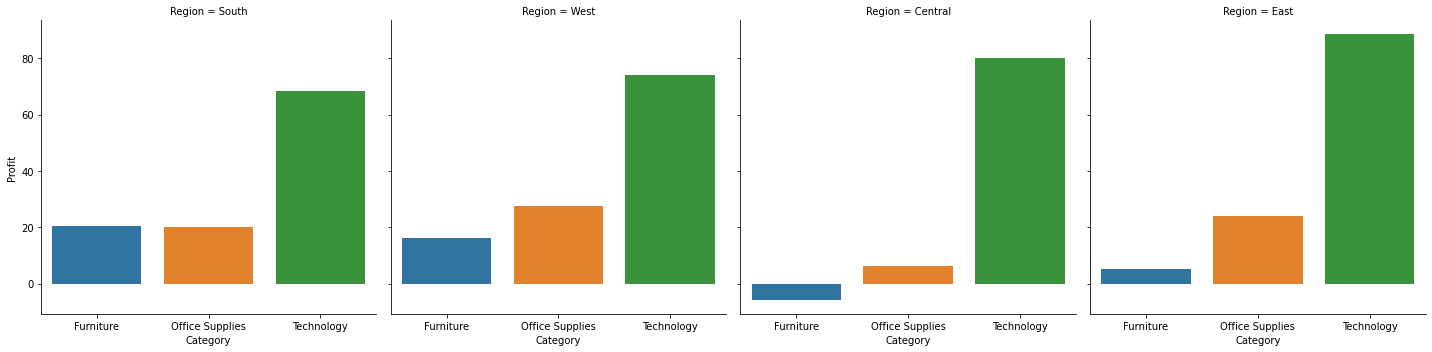

In [347]:
#for different regions
sns.catplot(x="Category",y="Profit",data=retail_b,kind='bar',ci=None,col="Region")

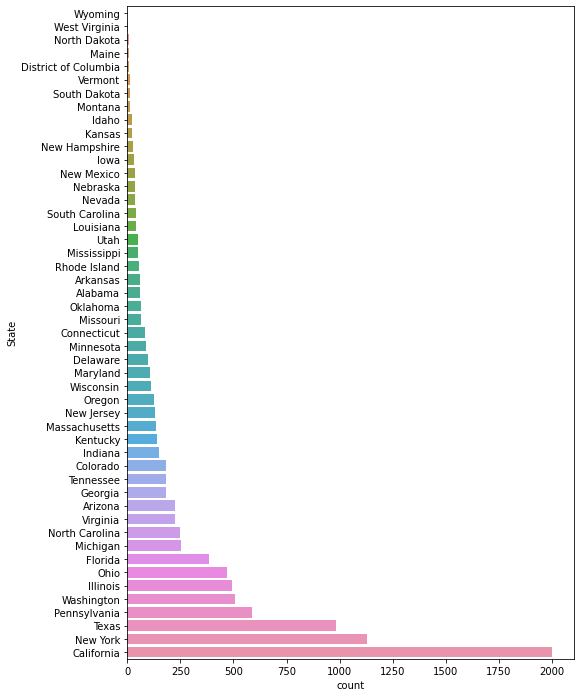

In [348]:
plt.subplots(figsize=(8,12))
order=retail_b.groupby(['State'])["State"].count().sort_values().index
sns.countplot(y='State',data=retail_b,order=order)
plt.show()

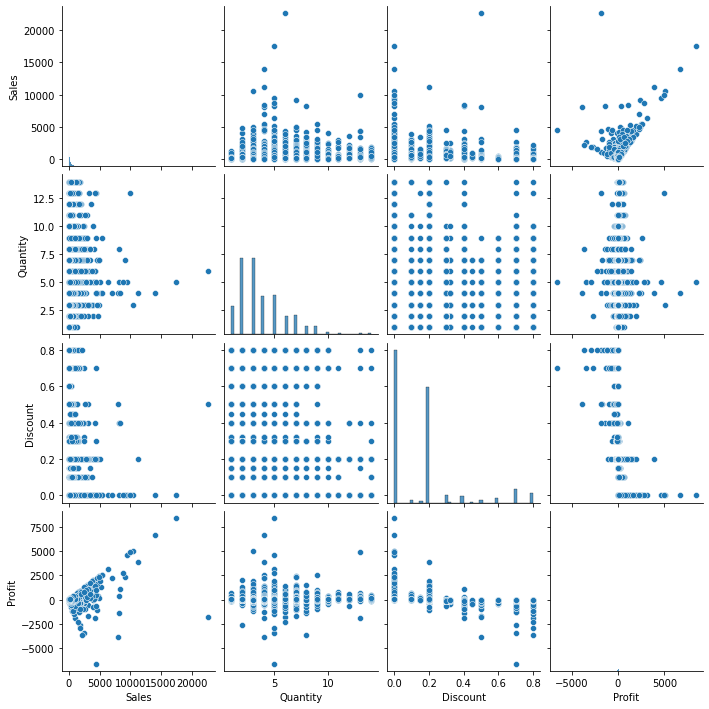

In [350]:
# pairing plots
retail_pair = sns.pairplot(retail_b)
retail_pair

### we conclude
+ We find most of the customers in California, New York and Texas. Hence these states can be generate more profit.
+ States like Wyoming, North Dakota and West Virginia have little or no sales at all. Hence, these states need to be reviewed.
+ More profit is generated with the sales of Technology goods, hence Sales can be broadened on for this category. On the other hand, furniture sales have not generated significant profits.
+ Selling Furtinure in Central region is loss-making.
+ Selling Furtinure in Eastern region is least profitable among all other regions and categories.
+ Profits among different segment do not vary much.